In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv("Dataset\Terras_Indigena_2017.csv")

In [3]:
df.head()

,FID,id_objeto,nome,nomeabrev,geometriaaproximada,perimetrooficial,areaoficialha,grupoetnico,datasituacaojuridica,situacaojuridica,nometi,id_produtor,id_elementoprodutor,codigofunai,geom
0,BC250_2017_Terra_Indigena_A.1,1,Pacheca,Pacheca,Não,28109800.0,185.21,Guarani,2001/1/15,Regularizada,Pacheca,250000,2.0,NaN,MULTIPOLYGON (((-51.817032999999896 -31.170511...
1,BC250_2017_Terra_Indigena_A.2,2,Cantagalo,Cantagalo,Não,885605.0,283.68,Guarani Mbyá,2007/1/11,Homologada ou demarcada,Cantagalo,250000,3.0,NaN,MULTIPOLYGON (((-51.0340119999999 -30.19090999...
2,BC250_2017_Terra_Indigena_A.3,3,Guarani de Águas Brancas,Guarani de Águas Brancas,Não,9000000.0,230.00,Guarani,1996/2/13,Declarada,Guarani de Águas Brancas,250000,4.0,NaN,"MULTIPOLYGON (((-51.60478499999989 -30.766948,..."
3,BC250_2017_Terra_Indigena_A.4,4,Capivari,Capivari,Não,3465950.0,43.32,Guarani Mbyá,2003/1/8,Regularizada,Capivari,250000,7.0,NaN,MULTIPOLYGON (((-50.359660999999896 -30.359487...
4,BC250_2017_Terra_Indigena_A.5,5,Salto Grande do Jacuí,Salto Grande do Jacuí,Não,7258320.0,234.96,Guarani,2002/11/20,Regularizada,Salto Grande do Jacuí,250000,1.0,NaN,MULTIPOLYGON (((-53.2281029999999 -29.07109199...


In [4]:
df = df.drop(columns=["FID","nome","geometriaaproximada","datasituacaojuridica","nometi", "id_produtor","codigofunai","id_elementoprodutor", "geom", "id_objeto", "areaoficialha", "grupoetnico"]).dropna()


In [5]:
dfst = df.copy()
dfst = dfst.drop(columns='perimetrooficial')

In [6]:
df = df.groupby(by='nomeabrev')['perimetrooficial'].sum()

In [7]:
df = df.sort_values(axis=0,ascending=False)

In [8]:
plot = df.head(10)

<AxesSubplot: title={'center': 'Comparação de areas indigenas (2017)'}, ylabel='Perimetro oficial'>

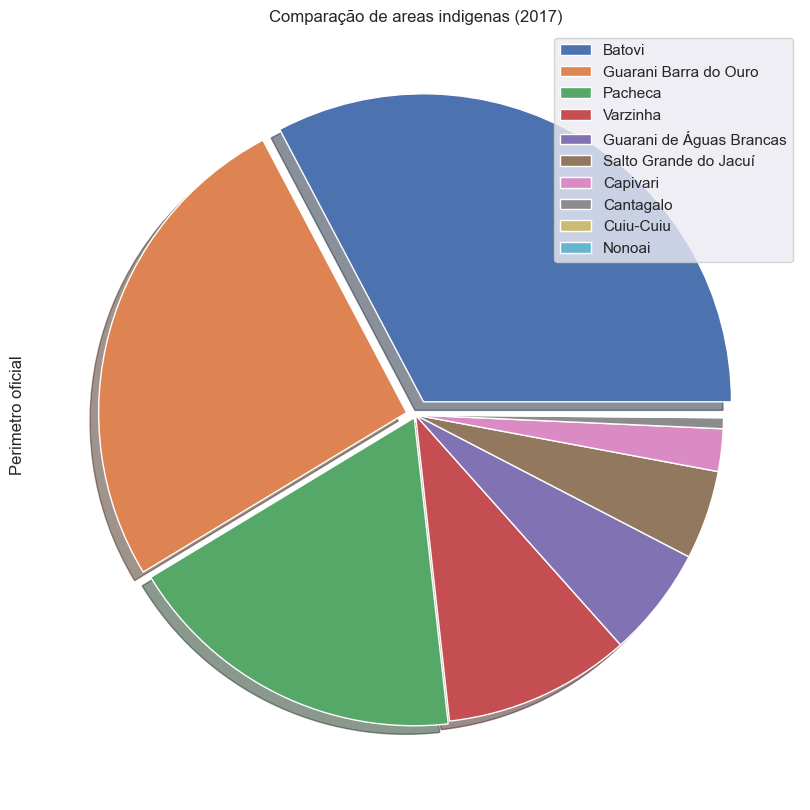

In [26]:
explodes = [0.05,0.03,0.01,0,0,0,0,0,0,0]

sns.set()
plot.plot(kind='pie', 
    labels = None, 
    figsize=(12,10), 
    legend=True, 
    title='Comparação de areas indigenas (2017)', 
    explode=explodes, 
    ylabel='Perimetro oficial',
    shadow=True,)

In [10]:
# onehotencoder = OneHotEncoder()

# X=onehotencoder.fit_transform(dfst['situacaojuridica'].values.reshape(-1,1)).toarray()
# X

In [11]:
# dfstonehot = pd.DataFrame(X, columns= ["situacaojuridica_"+str(int(i)) for i in range(dfst.shape[1])])
# dfst = pd.concat([dfst, dfstonehot], axis=1)

# dfst = dfst.drop(['situacaojuridica'], axis=1)

# dfst.head()

In [20]:
label_encoder = LabelEncoder()

dfst['situacaojuridica'] = label_encoder.fit_transform(dfst['situacaojuridica'])
dfst['situacaojuridica'].head(30)

0     2
1     1
2     0
3     2
4     2
5     2
6     2
7     0
8     0
9     0
10    0
11    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
Name: situacaojuridica, dtype: int64

<AxesSubplot: title={'center': 'Situacao juridica das terras indigenas'}, ylabel='Frequency'>

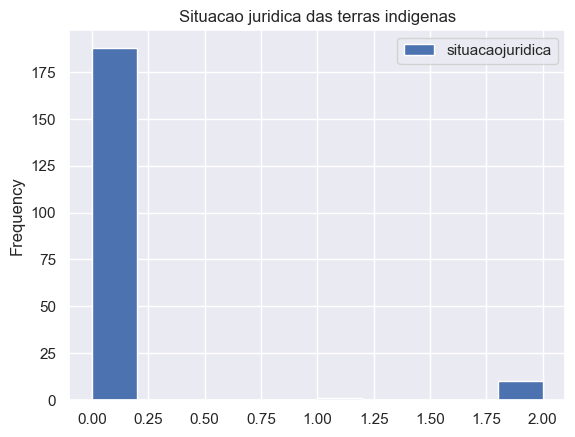

In [32]:
#0 - Declarada
#1 - Homologada ou demarcada
#2 - Regularizada

sns.set()
dfst['situacaojuridica'].plot(kind='hist', legend=True, title='Situacao juridica das terras indigenas')